In [28]:
from IPython.core.debugger import set_trace

import os
import sys
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder    #tranforma variables categoricas a numericas
from sklearn.preprocessing import StandardScaler  # Escala los datos
from sklearn.ensemble import IsolationForest      # Algoritmo de recorte
from sklearn.decomposition import PCA             # Reduccion de dimensionalidad
from sklearn.model_selection import train_test_split  # divide de manera aleatoria en sub conjuntos de datos de prueba y entrenamiento
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix      # genera la matriz de confusion
from sklearn.preprocessing import LabelEncoder    #tranforma variables categoricas a numericas
from sklearn.preprocessing import StandardScaler  # Escala los datos
import pickle
from numpy import linalg as LA

import statsmodels.api as sm
from sklearn.metrics import classification_report

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from sklearn.metrics import roc_curve, auc

In [2]:
pwd

'C:\\Users\\josrenca\\Desktop\\Universidad\\ARI-PI1-US-CarAccidentsAnalysis\\NoteBooks\\5. Modelos'

In [3]:
path = 'C:\\Users\\josrenca\\Desktop\\Universidad\\Datos PI - ARI\\'
archivo = 'cleanedVariables-standarized-respuestaBinaria.pkl'
rutaArvhivo = path + archivo
df = pd.read_pickle(rutaArvhivo)

In [4]:
df.shape

(3027853, 36)

In [5]:
df.columns

Index(['Amenity', 'Astronomical_Twilight', 'Bump', 'City', 'Civil_Twilight',
       'County', 'Crossing', 'Give_Way', 'Hour', 'Junction',
       'Nautical_Twilight', 'No_Exit', 'Railway', 'Roundabout', 'Severity',
       'Start_Lat', 'Start_Lng', 'State', 'Station', 'Stop', 'Street',
       'Sunrise_Sunset', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Weather_Condition', 'Wind_Direction', 'dayOfWeek', 'month',
       'newSeverity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Description'],
      dtype='object')

In [6]:
y1=df['Severity']
y2=df['newSeverity']

In [7]:
X = df[df.columns.difference(['Description', 'Severity', 'newSeverity'])]

In [8]:
# Mostrand listado final de variables predictoras
X.columns

Index(['Amenity', 'Astronomical_Twilight', 'Bump', 'City', 'Civil_Twilight',
       'County', 'Crossing', 'Give_Way', 'Hour', 'Humidity(%)', 'Junction',
       'Nautical_Twilight', 'No_Exit', 'Pressure(in)', 'Railway', 'Roundabout',
       'Start_Lat', 'Start_Lng', 'State', 'Station', 'Stop', 'Street',
       'Sunrise_Sunset', 'Temperature(F)', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Visibility(mi)', 'Weather_Condition', 'Wind_Direction',
       'Wind_Speed(mph)', 'dayOfWeek', 'month'],
      dtype='object')

# Modelo con Outliers

In [9]:
print('<<<Modelo 1>>>')
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.20, random_state = 5)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

print('\n<<<Modelo 2>>>')
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.20, random_state = 5)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

<<<Modelo 1>>>
(2422282, 33)
(605571, 33)
(2422282,)
(605571,)

<<<Modelo 2>>>
(2422282, 33)
(605571, 33)
(2422282,)
(605571,)


In [10]:
%%time
gbc = GradientBoostingClassifier().fit(X_train1, y_train1)

Wall time: 22min 28s


In [11]:
archivoModelo = "model-GBC-" + str(0) + "p-Severity.pkl"
rutaArchivo = path + "ModeloGBCBinaria\\" + archivoModelo  
modelfile = open(rutaArchivo, "wb")
pickle.dump(gbc, modelfile)
modelfile.close()

Text(0, 0.5, 'Feature Importance Score')

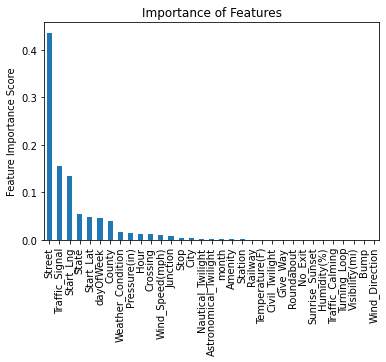

In [14]:
predictors=list(X_train1)
feat_imp = pd.Series(gbc.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [23]:
y_prob = gbc.predict_proba(X_test1)[:,1] # This will give you positive class prediction probabilities  
y_prob

array([0.06716532, 0.05378715, 0.14059687, ..., 0.51837054, 0.47281509,
       0.45187753])

In [25]:
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
gbc.score(X_test1, y_pred)

1.0

In [26]:
auc_roc=metrics.roc_auc_score(y_test1,y_pred)
auc_roc

0.6865828749200392

In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8108557695174121

In [15]:
predTest1 = gbc.predict(X_test1)
predTrain1 = gbc.predict(X_train1)

Text(0.5, 0, 'False Positive Rate')

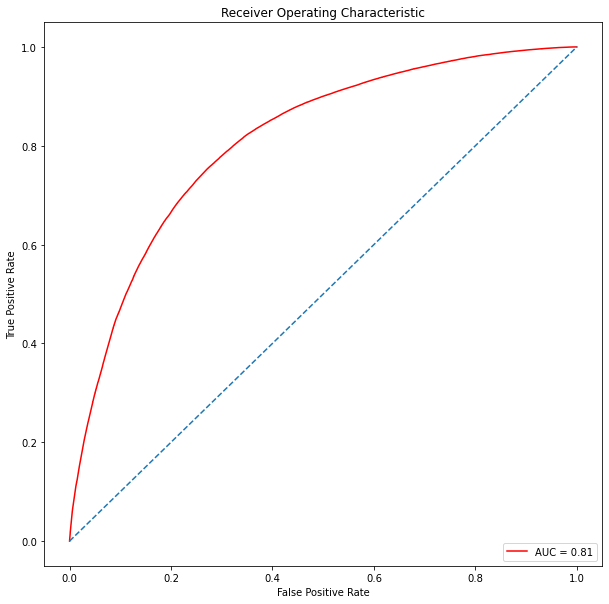

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [31]:
#Accuracy statistics
print('<<<Modelo 1>>>')
print('Accuracy Score Test:', metrics.accuracy_score(y_test1, predTest1))
print('Accuracy Score Train:', metrics.accuracy_score(y_train1, predTrain1))

<<<Modelo 1>>>
Accuracy Score Test: 0.7664485254412777
Accuracy Score Train: 0.766965200583582


In [32]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test1, predTest1)
print(cf_matrix)

[[374583  42323]
 [ 99109  89556]]


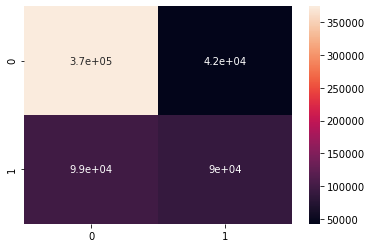

In [33]:
sns.heatmap(cf_matrix, annot=True)

In [34]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_train1, predTrain1)
print(cf_matrix)

[[1499745  170058]
 [ 394418  358061]]


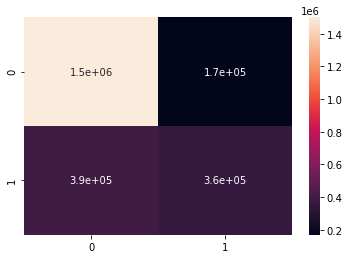

In [35]:
sns.heatmap(cf_matrix, annot=True)

In [36]:
print(classification_report(y_test1, predTest1))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84    416906
           1       0.68      0.47      0.56    188665

    accuracy                           0.77    605571
   macro avg       0.73      0.69      0.70    605571
weighted avg       0.76      0.77      0.75    605571



In [37]:
print(classification_report(y_train1, predTrain1))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84   1669803
           1       0.68      0.48      0.56    752479

    accuracy                           0.77   2422282
   macro avg       0.73      0.69      0.70   2422282
weighted avg       0.76      0.77      0.75   2422282



# Modelo eliminando outliers

In [23]:
numericData_lst = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

In [24]:
import time

def simulaciónModelo(variableObjetivo, contInicial, rango, numModelos, splitTest):
    
    print("Preparando los datos...")
    numsCond = []
    tiemposRecorte = []
    nombreVariableObj = variableObjetivo
    contaminacionVec = []
    
    contaminacion = contInicial
    for i in range(1,numModelos+1):
        
        start_time = time.time()
        
        print("\n\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Modelo: " + str(i) + " >>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        

        path = 'C:\\Users\\josrenca\\Desktop\\Universidad\\Datos PI - ARI\\'
        archivo = "cleanedData-IF-" + str(contaminacion) + "p-" + nombreVariableObj +".pkl"
        rutaArchivo = path + "DatosRecorteIFBinaria\\" + archivo
        df = pd.read_pickle(rutaArchivo)
        
        y = df[variableObjetivo]
        X = df[df.columns.difference(['Description', 'Severity', 'newSeverity'])]
        
        print("Contaminacion: " + str(contaminacion))
        print("Ruta archivo de datos: " + rutaArchivo)
        print("Nombre archivo datos: " + archivo)
        
        print('<<<Split entranimiento y testing>>>')
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = splitTest, random_state = 5)
        print(X_train.shape)
        print(X_test.shape)
        print(y_train.shape)
        print(y_test.shape)
        
        print("\nAjustando modelo...")
        model = GradientBoostingClassifier().fit(X_train, y_train)
        
        
        archivoModelo = "model-GBC-" + str(contaminacion) + "p-" + nombreVariableObj +".pkl"
        rutaArchivo = path + "ModeloGBCBinaria\\" + archivoModelo  
        modelfile = open(rutaArchivo, "wb")
        pickle.dump(model, modelfile)
        modelfile.close()
        
        print("\nRuta: " + rutaArchivo)
        print("Modelo guardado con nombre: " + archivoModelo)
        
        print("Prediciendo ...")
        predTest = model.predict(X_test)
        predTrain = model.predict(X_train)
        
        print("\nMetricas datos de prueba: ")
        print(classification_report(y_test, predTest))
        
        print("\nMetricas datos de entrenamiento: ")
        print(classification_report(y_train, predTrain))
        
        

        numCondActual = LA.cond(X[numericData_lst].cov().to_numpy())
        tiempoEjecucion = time.time() - start_time
        
        
        print("Numero condicion actual: " + str(numCondActual))
        print("-------- %s segundos --------" % (tiempoEjecucion))
        
        tiemposRecorte.append(tiempoEjecucion)
        numsCond.append(numCondActual)
        contaminacionVec.append(contaminacion)

        if i == 1 and contaminacion == 0.01:
            contaminacion = 0
        
        contaminacion=round(round(contaminacion,2)+round(rango,2),2)
        
    return contaminacionVec, tiemposRecorte, numsCond

In [25]:
%%time
contaminacionVec, tiemposRecorte, numsCond = simulaciónModelo("Severity", 0.1, 0.1, 4, 0.2)

Preparando los datos...


<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Modelo: 1 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Contaminacion: 0.1
Ruta archivo de datos: C:\Users\josrenca\Desktop\Universidad\Datos PI - ARI\DatosRecorteIFBinaria\cleanedData-IF-0.1p-Severity.pkl
Nombre archivo datos: cleanedData-IF-0.1p-Severity.pkl
<<<Split entranimiento y testing>>>
(2180053, 33)
(545014, 33)
(2180053,)
(545014,)

Ajustando modelo...

Ruta: C:\Users\josrenca\Desktop\Universidad\Datos PI - ARI\ModeloGBCBinaria\model-GBC-0.1p-Severity.pkl
Modelo guardado con nombre: model-GBC-0.1p-Severity.pkl
Prediciendo ...

Metricas datos de prueba: 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84    379463
           1       0.67      0.46      0.55    165551

    accuracy                           0.77    545014
   macro avg       0.73      0.68      0.70    545014
weighted avg       0.76      0.77      0.75    545014


Metricas datos de entrenamiento: 
              precision    

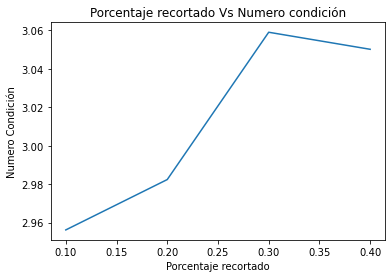

In [26]:
plt.title("Porcentaje recortado Vs Numero condición")
plt.ylabel("Numero Condición")
plt.xlabel("Porcentaje recortado")
plt.plot(contaminacionVec,numsCond)

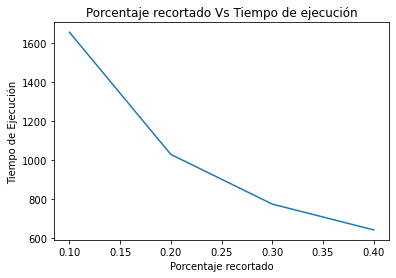

In [27]:
plt.title("Porcentaje recortado Vs Tiempo de ejecución")
plt.ylabel("Tiempo de Ejecución")
plt.xlabel("Porcentaje recortado")
plt.plot(contaminacionVec,tiemposRecorte)